# Introduction

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab (**Yellow** and **Pink**) industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Data Set Information**:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

## Load Data

The first thing done is to import needed libraries to analyse the data. Next the csv files are put into pandas databases.

In [126]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [127]:
cab_df = pd.read_csv('/content/Cab_Data.csv')
city_df = pd.read_csv('/content/City.csv')
customer_df = pd.read_csv('/content/Customer_ID.csv')
transaction_df = pd.read_csv('/content/Transaction_ID.csv')


## Data Observation

After the databases are made, I looked at each one to identify their data, and if they can be merged.

First we look at the `cab_db`. We see that it has the following columns:

- **Transaction ID**: The unique ID for each ride.
- **Date of Travel**: The date of the travel.
- **Company**: The name of company.
- **City**: The city where the user take ride.
- **KM Traveled**: The length of the travel.
- **Price Charged**: The ammount charged to the customer.
- **Cost of Trip**: The cost of the trip for the company.

In [128]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [129]:
print(f"number of row and column:",cab_df.shape)

number of row and column: (359392, 7)


`city_db` contains the following columns:

- **City**: Name of the city.
- **Population**: Population of the city.
- **Users**: Number of customers in the city.

In [130]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [131]:
print(f"number of row and column:",city_df.shape)

number of row and column: (20, 3)


`customer_db` contains the following columns:

- **Customer ID**: Unique ID for each customer.
- **Gender**: Gender of the customer.
- **Age**: Age of the customer.
- **Income (USD/Month)**: Salary of customer in each month.

In [132]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [133]:
print(f"number of row and column:",customer_df.shape)

number of row and column: (49171, 4)


`transaction_db` contains the following columns:

- **Transaction ID**: A unique ID for each ride.
- **Customer ID**: A unique ID for each customer.
- **Payment_Mode**: Payment method for the transaction.

In [134]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [135]:
print(f"number of row and column:", transaction_df.shape)

number of row and column: (440098, 3)


## NA value and outlier detection

In [136]:
# Detect NA values in each file
print(cab_df.isnull().values.any())
print(city_df.isnull().values.any())
print(customer_df.isnull().values.any())
print(transaction_df.isnull().values.any())

False
False
False
False


In [137]:
!pip install outlier-detection
from outlier_detection import detect_outliers_using_iqr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lower Bound Threshold: -359.39625
Upper Bound Threshold: 1149.49375
No. of Observation beyond lower bound: 0
No. of Observation beyond upper bound: 5958
No. of Observation between upper and lower bound: 353434
Ratio of Outliers for target variable: 2.0%


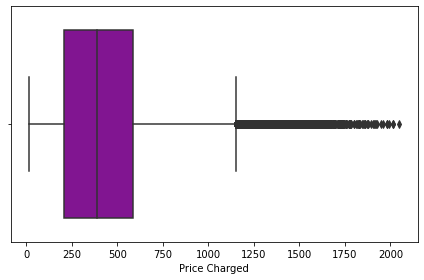


Factor: Pink Cab
Lower Bound Threshold: -262.3325
Upper Bound Threshold: 863.8074999999999
No. of Observation beyond lower bound: 0
No. of Observation beyond upper bound: 237
No. of Observation between upper and lower bound: 84474
Ratio of Outliers for target variable Pink Cab: 0.0%

Factor: Yellow Cab
Lower Bound Threshold: -384.11999999999995
Upper Bound Threshold: 1244.6799999999998
No. of Observation beyond lower bound: 0
No. of Observation beyond upper bound: 3240
No. of Observation between upper and lower bound: 271441
Ratio of Outliers for target variable Yellow Cab: 1.0%


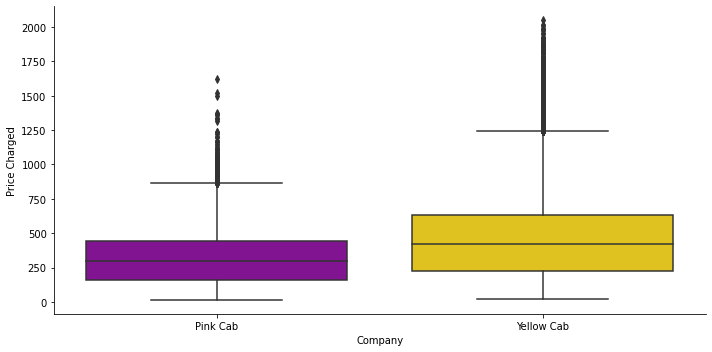

In [138]:
# Detect outliers using Interquartile Range (IQR) Method
detect_outliers_using_iqr(cab_df, 'Price Charged') # on overall data
detect_outliers_using_iqr(cab_df, 'Price Charged', is_factor=True, factor='Company') # check the outliers of 'Price Charged' by taking company as the factor 

## Data format checking

The **'Date of Travel'** column seems in wrong format. The date range should from 31/01/2016 to 31/12/2018.

In [139]:
min_val = cab_df["Date of Travel"].min() 
print(min_val)
max_val = cab_df["Date of Travel"].max() 
print(max_val)

42371
43465


In order to make 'min_val' 'and max_val' represent year 2016 and 2018. Assume the start date is from 01/01/1900.
Then the valid date can be computed by start date + **'Date of Travel'**

In [140]:
from datetime import date, timedelta, datetime


cab_df['Year'] = cab_df['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%Y"))
cab_df['Month'] = cab_df['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%m"))
cab_df['Date of Travel'] = cab_df['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%Y-%m-%d"))

col_year = cab_df.pop('Year')
col_month = cab_df.pop('Month')
cab_df.insert(2, col_year.name, col_year)
cab_df.insert(3, col_month.name, col_month)


In [141]:
cab_df.head()

,Transaction ID,Date of Travel,Year,Month,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,2016,01,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,2016,01,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,2016,01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,2016,01,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,2016,01,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## Identify relationships and merge Data

There are common columns **'City'**, **'Transaction ID'** and **'Customer ID'** among 'cab_df', 'city_df', 'transaction_df' and 'customer_df'. 
It is necessary to merge those three dataframe together.


In [142]:
cab_merged = pd.merge(cab_df, city_df, how='left', on='City')
cab_merged = pd.merge(cab_merged, transaction_df, how='left', on='Transaction ID')
cab_merged = pd.merge(cab_merged, customer_df, how='left', on='Customer ID')


In [143]:
cab_merged.head()

,Transaction ID,Date of Travel,Year,Month,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,2016,01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,2016-01-08,2016,01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,2016-01-04,2016,01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,2016-01-09,2016,01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,2016-01-05,2016,01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536


In [144]:
print(cab_merged.groupby(['Payment_Mode']).size())
print(cab_merged.groupby(['Gender']).size())


Payment_Mode
Card    215504
Cash    143888
dtype: int64
Gender
Female    153480
Male      205912
dtype: int64


The **'Population'** and **'Users'** are in string format. It needs to be converted to numerical numbers.

In [145]:
cab_merged['Users'] = cab_merged['Users'].apply(lambda x: int(x.split()[0].replace(',', '')))
cab_merged['Population'] = cab_merged['Population'].apply(lambda x: int(x.split()[0].replace(',', '')))



In [146]:
cab_merged.head()


,Transaction ID,Date of Travel,Year,Month,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,2016,01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-08,2016,01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-04,2016,01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-09,2016,01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-05,2016,01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536


It is good to know the profit that company made in each ride.
**Profit** column is created and added into dataframe by subtracting the **Cost of Trip** from the **Price Charged**.

In [147]:
profit = cab_merged['Price Charged'] - cab_merged['Cost of Trip']
cab_merged.insert(9, 'Profit', profit)
cab_merged.head()

,Transaction ID,Date of Travel,Year,Month,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,2016,01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-08,2016,01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-04,2016,01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-09,2016,01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-05,2016,01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,814885,24701,27182,Card,Male,33,8536


In order to compare the two companies. It is better to seperate the dataframe for each one.

In [148]:
pink = cab_merged[cab_merged.Company == 'Pink Cab']
yellow = cab_merged[cab_merged.Company == 'Yellow Cab']
pink_c = '#9000a6'

In [149]:
pink.head()

,Transaction ID,Date of Travel,Year,Month,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,2016,01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-08,2016,01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-04,2016,01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-09,2016,01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-05,2016,01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,814885,24701,27182,Card,Male,33,8536


## Data Analysis

Now we begin the process of answering our questions.

### Profits

First we look into which company has a higher profit. In order to prep the data, a variable was made to represent the **profit per year** and **profit percentage per year** for each company.

This iformation was put into both a table, and line graphs for each topic as shown below.

In [150]:
import plotly.graph_objects as go

pink_2016 = round(pink[pink.Year == '2016'].Profit.sum(), 2)
pink_2016_per = round((pink_2016 / 
                       (pink[pink.Year == '2016']['Price Charged'].sum()) * 100), 2)
pink_2017 = round(pink[pink.Year == '2017'].Profit.sum(), 2)
pink_2017_per = round((pink_2016 / 
                       (pink[pink.Year == '2017']['Price Charged'].sum()) * 100), 2)
pink_2018 = round(pink[pink.Year == '2018'].Profit.sum(), 2)
pink_2018_per = round((pink_2016 / 
                       (pink[pink.Year == '2018']['Price Charged'].sum()) * 100), 2)
pink_avg = round(((pink_2016 + pink_2017 + pink_2018) / 3), 2)
pink_per_avg = round(((pink_2016_per + pink_2017_per+ pink_2018_per)/ 3), 2)

yellow_2016 = round(yellow[yellow.Year == '2016'].Profit.sum(), 2)
yellow_2016_per = round((yellow_2016 / (yellow[yellow.Year == '2016']['Price Charged'].sum()) * 100), 2)
yellow_2017 = round(yellow[yellow.Year == '2017'].Profit.sum(), 2)
yellow_2017_per = round((yellow_2017 / (yellow[yellow.Year == '2017']['Price Charged'].sum()) * 100), 2)
yellow_2018 = round(yellow[yellow.Year == '2018'].Profit.sum(), 2)
yellow_2018_per = round((yellow_2018 / (yellow[yellow.Year == '2018']['Price Charged'].sum()) * 100), 2)
yellow_avg = round(((yellow_2016 + yellow_2017 + yellow_2018) / 3), 2)
yellow_per_avg = round(((yellow_2016_per + yellow_2017_per + yellow_2018_per)/ 3), 2)


fig = go.Figure(data=[go.Table(header=dict(values=['Company', '2016 Profit', '2016 Profit Margin (%)', 
                                                   '2017 Profit', '2017 Profit Margin (%)', '2018 Profit',
                                                   '2018 Profit Margin (%)', 'Average Profit', 'Average Profit Margin (%)']),
                 cells=dict( values=[['Pink Cab', 'Yellow Cab'], 
                                    [pink_2016, yellow_2016],
                                    [pink_2016_per, yellow_2016_per],
                                    [pink_2017, yellow_2017],
                                    [pink_2017_per, yellow_2017_per], 
                                    [pink_2018, yellow_2018],
                                    [pink_2018_per, yellow_2018_per],
                                    [pink_avg, yellow_avg],
                                    [pink_per_avg, yellow_per_avg]]))])
fig.show()

As you can see, **Yellow Cab** has a higher **Average Profit** ($14,661,003.83) and **Average Profit Margin** (34.99%).

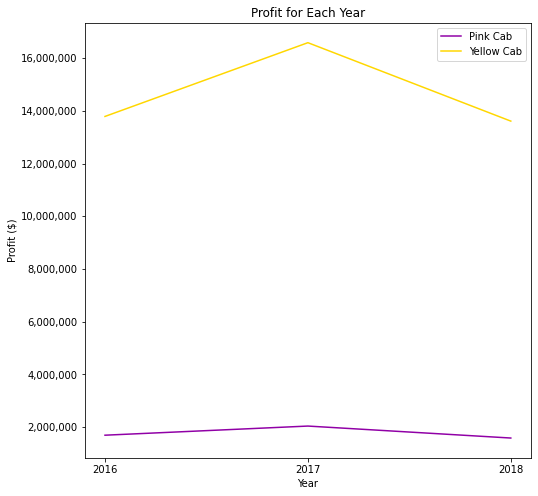

In [151]:
pink_profit = [pink_2016, pink_2017, pink_2018]
yellow_profit = [yellow_2016, yellow_2017, yellow_2018]
years = [2016, 2017, 2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_profit, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_profit, color='gold', label = 'Yellow Cab')
ax.set_xticks(years)
ax.ticklabel_format(style='plain')
plt.title('Profit for Each Year')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.legend()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('profit_per_year.png')
plt.show()


The above graphs highlights that both companies had more **profits** in 2017 while have less in 2018.

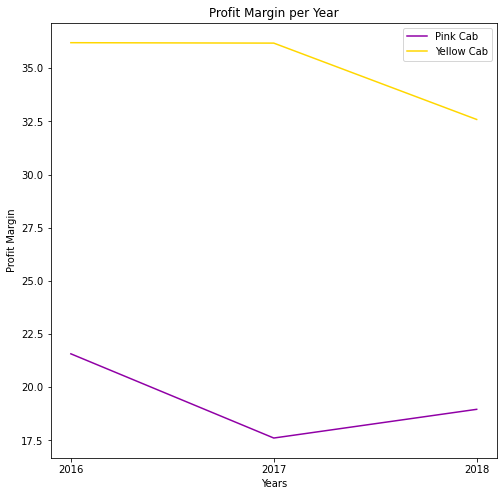

In [152]:
pink_per_list = [pink_2016_per, pink_2017_per, pink_2018_per]
yellow_per_list = [yellow_2016_per, yellow_2017_per, yellow_2018_per]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_per_list, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_per_list, color='gold', label='Yellow Cab')
plt.title('Profit Margin per Year')
plt.legend()
plt.ylabel('Profit Margin')
plt.xlabel('Years')
ax.set_xticks(years)
plt.savefig('profit_margin.png')
plt.show()

This graph highlights some differences between the two companies.

**Yellow Cab**
- Very similar **profit margin** in 2016 and 2017
- Drop in **profit margin** in 2018
- While **profit** was UP from 2017 to 2018, the **profit margin** went down

**Pink Cab**
- Drop in **profit margin** from 2016 to 2017 
- Rise in **profit margin** in 2018
- While **profit** dropped 2018, **profit margin** increased 

### Number of customers 

For the number of rides per year. This is done by summation the number of `Transaction ID` in each year.

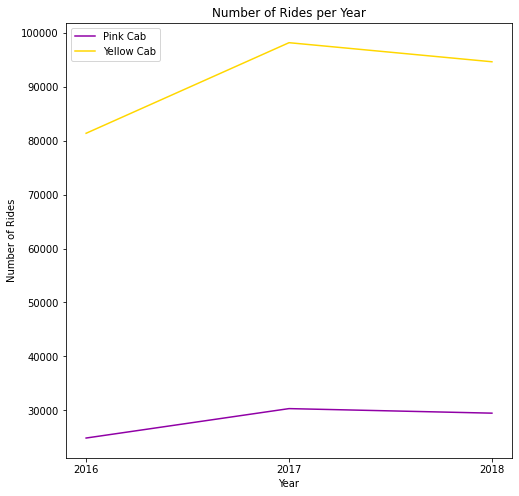

In [153]:
yellow_rides_2016 = yellow[yellow.Year == '2016']['Transaction ID'].count()
yellow_rides_2017 = yellow[yellow.Year == '2017']['Transaction ID'].count()
yellow_rides_2018 = yellow[yellow.Year == '2018']['Transaction ID'].count()
yellow_rides_full = [yellow_rides_2016, yellow_rides_2017, yellow_rides_2018]

pink_rides_2016 = pink[pink.Year == '2016']['Transaction ID'].count()
pink_rides_2017 = pink[pink.Year == '2017']['Transaction ID'].count()
pink_rides_2018 = pink[pink.Year == '2018']['Transaction ID'].count()
pink_rides_full = [pink_rides_2016, pink_rides_2017, pink_rides_2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_rides_full, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_rides_full, color='gold', label='Yellow Cab')
plt.legend()
plt.title('Number of Rides per Year')
plt.ylabel('Number of Rides')
plt.xlabel('Year')
ax.set_xticks(years)
plt.savefig('num_rides.png')

plt.show()

We see that while both companies have s similar pattern, **Yellow Cab** does over twice as many rides as **Pink Cab**

## Preferable Payment Method 
Check the preferable payment method for different age groups 

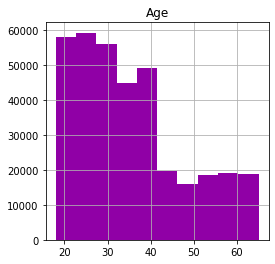

In [154]:
features = ["Age"]
cab_merged[features].hist(figsize=(4, 4));

Young people (age below 40) take more cab rides.

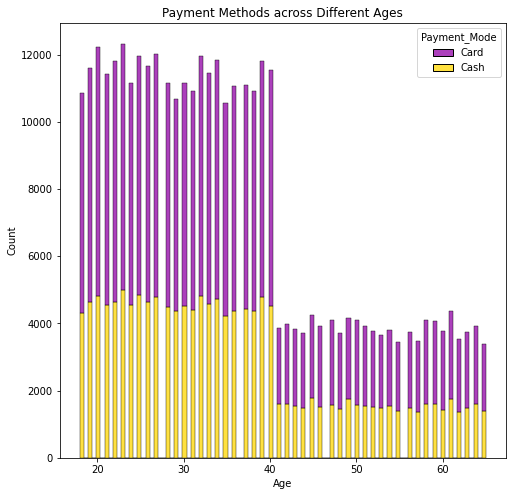

In [155]:
fig = plt.figure(figsize=(8, 8))
sns.histplot(data=cab_merged, x='Age', hue='Payment_Mode', multiple="stack")
plt.title('Payment Methods across Different Ages')
plt.show()

It is clear that the people below age 40 prefer using the card to pay the bill rather than cash. 

### Unique Customers

The number of unique customers for each company over the years.

[]

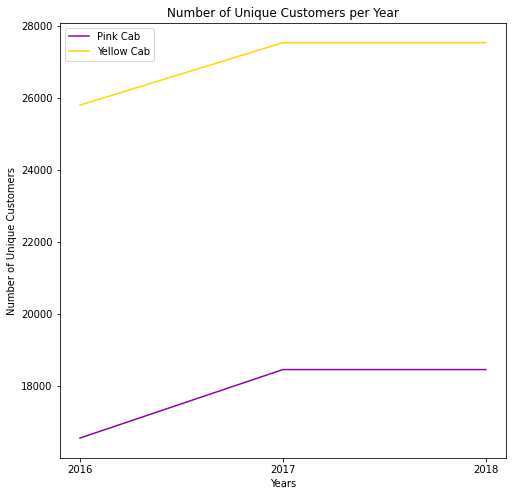

In [156]:
pink_users_2016 = pink[pink.Year == '2016']['Customer ID'].nunique()
pink_users_2017 = pink[pink.Year == '2017']['Customer ID'].nunique()
pink_users_2018 = pink[pink.Year == '2018']['Customer ID'].nunique()
pink_users = [pink_users_2016, pink_users_2018, pink_users_2018]

yellow_users_2016 = yellow[yellow.Year == '2016']['Customer ID'].nunique()
yellow_users_2017 = yellow[yellow.Year == '2017']['Customer ID'].nunique()
yellow_users_2018 = yellow[yellow.Year == '2018']['Customer ID'].nunique()
yellow_users = [yellow_users_2016, yellow_users_2018, yellow_users_2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
sns.lineplot(x=years, y=pink_users, color=pink_c, label='Pink Cab')
sns.lineplot(x=years, y=yellow_users, color='gold', label='Yellow Cab')
plt.title('Number of Unique Customers per Year')
plt.xlabel('Years')
plt.ylabel('Number of Unique Customers')
ax.set_xticks(years)
plt.savefig('unique_customers.png')

plt.plot()

As with the ride numbers, the unique customers for both companies have a similar patter with **Yellow Cab** having a larger number.

### Rides per Month

Next we look at the number of rides per month for each company to see if there is any seasonality.

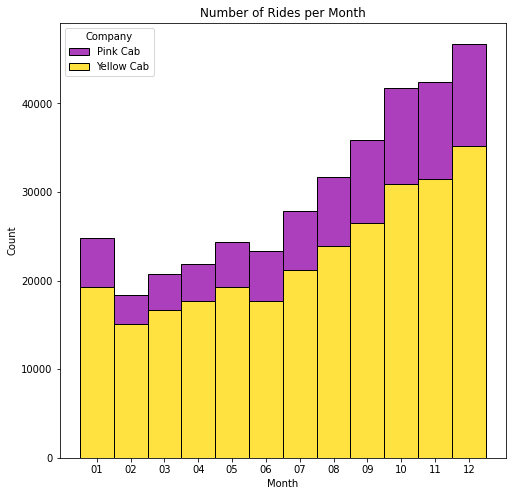

In [157]:
colors = [pink_c, 'gold']
custom_palette = sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize=(8, 8))
sns.histplot(data=cab_merged, x='Month', hue='Company', palette=custom_palette, multiple="stack")
plt.title('Number of Rides per Month')
plt.savefig('montlhy_rides.png')

plt.show()

Main observations:
- The number of rides go up quickly each month after June
- The highest number of rides is in December

### Profit per Month

The last question we will look into is which month has the highest profit.

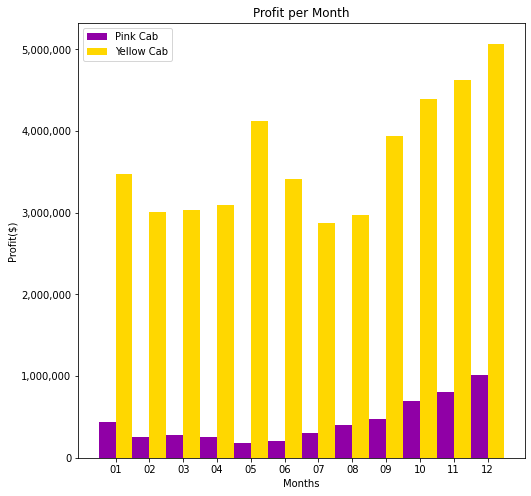

In [158]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
def profit_per_month(db):
    result = []
    for month in months:
        profits = db[db.Month == month].Profit.sum()
        result.append(profits)
    return result

month_range = np.arange(len(months))
width = 0.5

fig=plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(month_range, profit_per_month(pink), width, label='Pink Cab')
plt.bar(month_range + width, profit_per_month(yellow), width, label='Yellow Cab')
plt.xticks(month_range + width / 2, months)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Profit per Month')
plt.ylabel('Profit($)')
plt.xlabel('Months')
plt.legend()
plt.savefig('monthly_profit.png')

plt.show()

Main observations:

**Yellow Cab**
- Lower profits in Feb-Apr and July-Aug
- Highest profit in December

**Pink Cab**
- Lower profits from Feb - July
- Profits rise from July and reach highest point in December

**General**
- Yellow Cab have relatively high profits across months

## Correlation check

Drop non-numerical variables and check the correlation among numerical variables

compute all the columns' name

In [159]:
print(cab_merged.columns.values)

['Transaction ID' 'Date of Travel' 'Year' 'Month' 'Company' 'City'
 'KM Travelled' 'Price Charged' 'Cost of Trip' 'Profit' 'Population'
 'Users' 'Customer ID' 'Payment_Mode' 'Gender' 'Age' 'Income (USD/Month)']


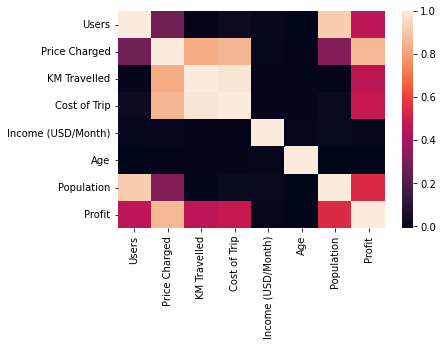

In [160]:
numerical = list(
    set(cab_merged.columns)
    - {
        'Transaction ID',
        'Customer ID',
        'Date of Travel',
        'Company', 
        'City',
        'Payment_Mode',
        'Gender',
    }
)

# Calculate and plot
corr_matrix = cab_merged[numerical].corr()
sns.heatmap(corr_matrix);

Main findings:

- 'Profit' has positive correlation with 'Population'
- 'Price Charged' has positive correlation with 'Users'

##Conclusion:

According to previous analysis, the Yellow company is worth to invest.
